# 1 - Introduction

## Welcome to the Euler-Maruyama ReCoDe project!

This project consists of a series of notebooks to demonstrate the implementation of the Euler-Maruyama (EM) method for solving a Stochastic Differential Equation (SDE). In a nutshell, an SDE is a mathematical equation that describes the time-evolution of a random fluctuating variable. SDEs arise in many scientific and engineering fields such as biology, physics or finance. Solving these equations allows us to simulate systems containing a random component, which allows us to understand its behaviour. The EM is one of the simplest yet most powerful techniques for numerically solving a SDE. Through this project, you will be able to effectively implement the EM method to solve an SDE following best practices in research computing and data science.

## Pre-requisites

Before going into the details of SDEs, the EM method and how to code it, let us take a moment to refresh our knowledge of `numpy` and `matplotlib` libraries. These are the basic libraries we will use to implement the EM method and numerically solve an SDE. This notebook provides a basic introduction to some of the instructions and commands we will use in the project. For a more in-depth review of these libraries, you can check the following courses from the Research Computing & Data Science Skills Courses:
* `numpy`: https://github.com/ImperialCollegeLondon/RCDS-numerical-computing-in-python-with-numpy-and-scipy
* `matplotlib`: https://github.com/ImperialCollegeLondon/RCDS-plotting-in-python-with-matplotlib

## Contents
### [A. Numpy](#numpy) 
### [B. Matplotlib](#matplotlib) 

<a id="numpy"></a>
### A. Numpy

`Numpy` is a Python package for numerical computing and array manipulation. We can use `numpy` to define arrays (vectors) which store numbers and operate with them. Below, we provide basic examples to remember 
the advantages of using `numpy`.

In [1]:
import numpy as np

# First, we define a 1-D numpy array
x = np.array([1, 2, 3, 4, 5, 6])
print("x: ", x)

x:  [1 2 3 4 5 6]


In [2]:
# We can check the shape of the array
print("x shape: ", x.shape)

x shape:  (6,)


In [3]:
# We can define multidimensional arrays
y = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("y: \n", y)
print("y shape: ", y.shape)

y: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
y shape:  (3, 3)


In [4]:
# Perform element-wise mathematical operations is easy
x2 = x + 2
x3 = x * 2
x4 = x ** 2  # square
print("x2: ", x2)
print("x3: ", x3)
print("x4: ", x4)

x2:  [3 4 5 6 7 8]
x3:  [ 2  4  6  8 10 12]
x4:  [ 1  4  9 16 25 36]


In [5]:
# We can also operate with several arrays
x5 = x[::-1]  # this operation reverses the x array
x6 = x - x5
print("x6: ", x6)

x6:  [-5 -3 -1  1  3  5]


In [6]:
x7 = np.array([-1, -1, 0, 0, 1, 1])
x8 = x * x7  # this applies the element-wise product
print("x8: ", x8)

x8:  [-1 -2  0  0  5  6]


In [7]:
# We can also define vectorial product
xx = np.dot(x, x)
print("vectorial product of (x, x): ", xx)  # a scalar

y2 = np.array([[1, 1, 1], [-1, -1, -1], [1, 1, 1]])
y3 = np.dot(y, y2)  # this will be equivalent to y3 = y @ y2 -> a (3, 3) x (3, 3) matrix multiplication
print("y3: \n", y3)  # a 3x3 array

vectorial product of (x, x):  91
y3: 
 [[2 2 2]
 [5 5 5]
 [8 8 8]]


In [8]:
# We can redefine the shape of an array
x_reshaped = x.reshape(1, -1)  # from (6, ) to (1, 6)
x7_reshaped = x7.reshape(-1, 1) # from (6, ) to (6, 1)
x9 = np.dot(x7_reshaped, x_reshaped)  # a (6, 1) x (1, 6) array multiplication
print("x9: \n", x9)
print("x9 shape: ", x9.shape)

x9: 
 [[-1 -2 -3 -4 -5 -6]
 [-1 -2 -3 -4 -5 -6]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  2  3  4  5  6]
 [ 1  2  3  4  5  6]]
x9 shape:  (6, 6)


In [9]:
# Another useful function is stacking arrays
x10 = np.stack([x, x], axis=0) 
print("x10: \n", x10)
print("x10 shape: ", x10.shape)

x11 = np.stack([x, x], axis=1)
print("x11: \n", x11)
print("x11 shape: ", x11.shape)

x10: 
 [[1 2 3 4 5 6]
 [1 2 3 4 5 6]]
x10 shape:  (2, 6)
x11: 
 [[1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]]
x11 shape:  (6, 2)


In [10]:
# There is a collection of pre-implemented mathematical functions
x_mean = np.mean(x)
print("x mean: ", x_mean)

y_col_mean = np.mean(y, axis=0)
y_row_mean = np.mean(y, axis=1)
print("y column mean: ", y_col_mean)
print("y row mean: ", y_row_mean)

x_exp = np.exp(x)
print("exp(x) :\n", x_exp)

x_log = np.log(x)
print("log(x) :\n", x_log)

y_sqrt = np.sqrt(y)
print("sqrt(y) :\n", y_sqrt)

x mean:  3.5
y column mean:  [4. 5. 6.]
y row mean:  [2. 5. 8.]
exp(x) :
 [  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591
 403.42879349]
log(x) :
 [0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947]
sqrt(y) :
 [[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]
 [2.64575131 2.82842712 3.        ]]


That concludes the brief `numpy` review. For more information, you can visit the `numpy` [documentation](https://numpy.org/doc/stable/index.html).

<a id="matplotlib"></a>
### B. Matplotlib 

Another useful library for our purposes is `matplotlib`. It is a comprehensive data visualisation package. We can use matplotlib to plot figures containing distinct types of charts based on the numerical results stored in `numpy`.

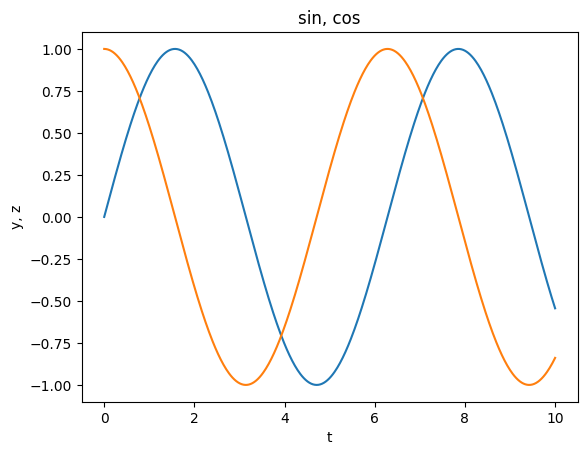

In [11]:
import matplotlib.pyplot as plt

# We can plot a line using numpy arrays
x = np.linspace(0, 10, 500)  # this generates 500 equally-spaced values between 0 and 10
y = np.sin(x)
z = np.cos(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, z)
ax.set_xlabel("t")
ax.set_ylabel("y, z")
ax.set_title("sin, cos")
plt.show()

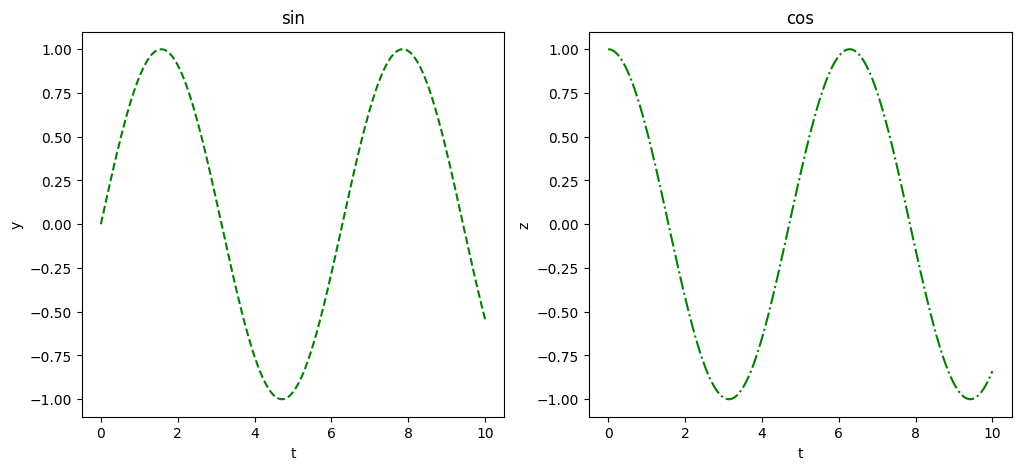

In [12]:
# Or in different graphs
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 5))  # this indicates 1 row and 2 columns

ax0.plot(x, y, color="green", ls="--")
ax0.set_xlabel("t")
ax0.set_ylabel("y")
ax0.set_title("sin")

ax1.plot(x, z, color="green", ls="-.")
ax1.set_xlabel("t")
ax1.set_ylabel("z")
ax1.set_title("cos")

plt.show()

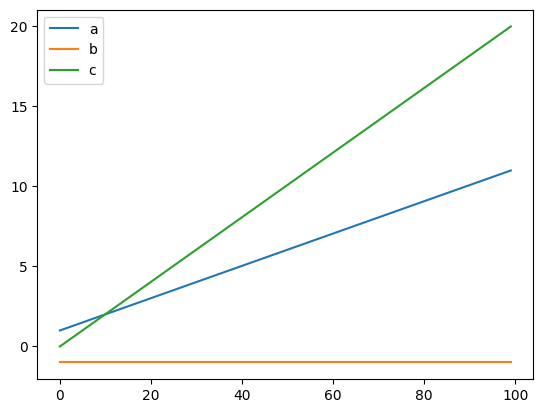

In [13]:
# Plotting multiple arrays

x = np.linspace(0, 10, 100)
y_ones = np.ones_like(x)  # this generates an array of 1's with the same shape than x
y = np.stack([y_ones] * 3)  # y shape: (3, 100)
y[0, :] = y[0, :] + x   # sum x to the first row 
y[1, :] = y[1, :] * (-1)  # multiply the second row by (-1) 
y[2, :] = y[2, :] * 2*x  # multiply the third row by x 
y = y.T  # transpose the array for plotting purposes, y shape: (100, 3)

fig, ax = plt.subplots()
ax.plot(y)
ax.legend(["a", "b", "c"])
plt.show()

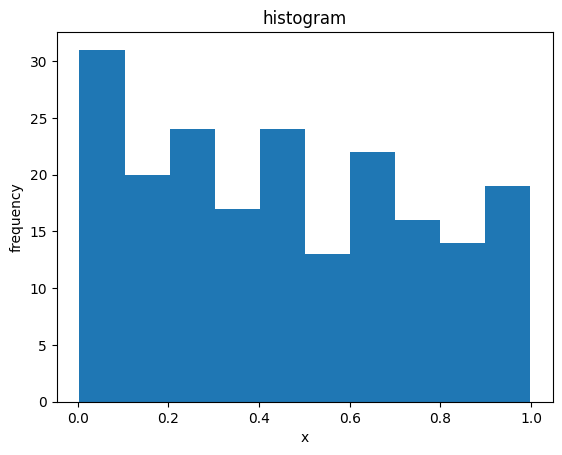

In [14]:
# Plot a histogram is easy
x = np.random.rand(200)  # this function gives us 200 random values between 0 and 1

fig, ax = plt.subplots()
ax.hist(x)
ax.set_xlabel("x")
ax.set_ylabel("frequency")
ax.set_title("histogram")

plt.show()

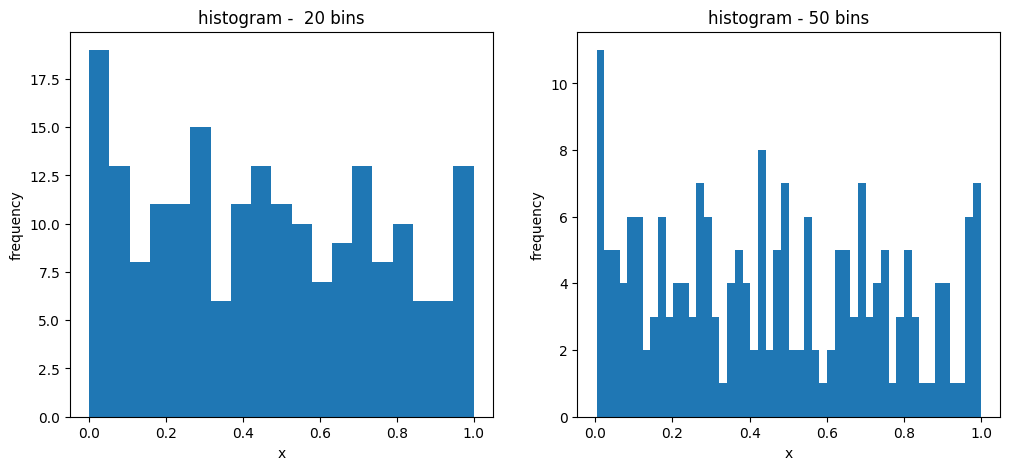

In [15]:
# We can define the bins used in the histograms

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 5))

ax0_bins = np.linspace(0, 1, 20)  # 20 bins equally-spaced between 0 and 1
ax0.hist(x, bins=ax0_bins)
ax0.set_xlabel("x")
ax0.set_ylabel("frequency")
ax0.set_title("histogram -  20 bins")

ax1_bins = 50  # 50 bins
ax1.hist(x, bins=ax1_bins)
ax1.set_xlabel("x")
ax1.set_ylabel("frequency")
ax1.set_title("histogram - 50 bins")

plt.show()

That concludes the brief introduction to `matplotlib`. For more information, you can visit the `matplotlib` [documentation](https://matplotlib.org/stable/index.html).

### Conclusions

That concludes the first of our series of notebooks. We have reviewed how to use `numpy` and `matplotlib` packages. We hope this refresh helps you through the rest of the project. 